In [1]:
#!wget https://www.cs.ubc.ca/~little/cpsc425/assignments/hw5.zip

In [2]:
#!unzip -q hw5.zip

Getting paths and labels for all train and test data

Extracting SIFT features



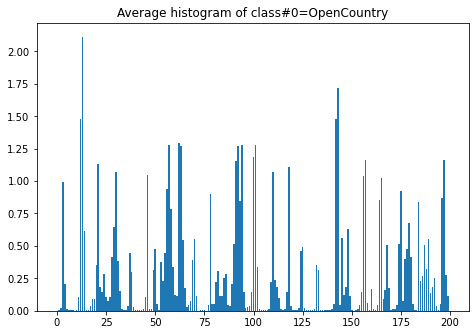

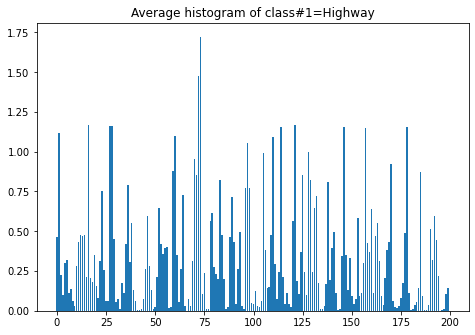

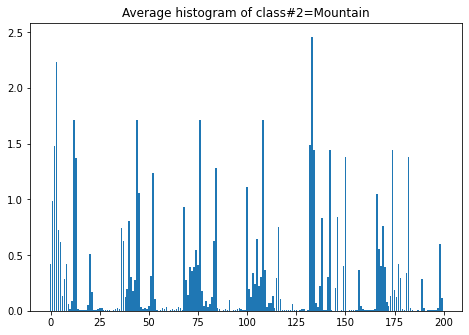

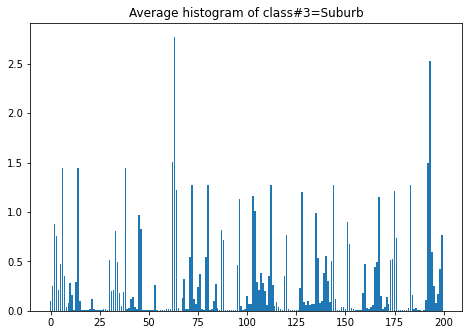

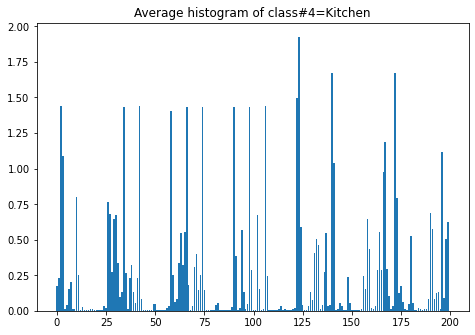

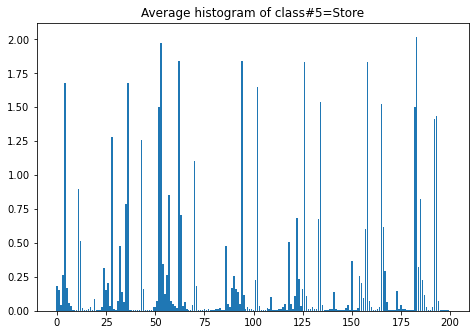

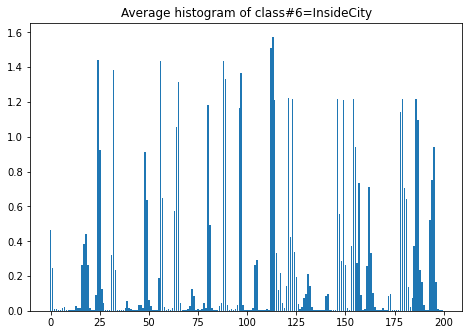

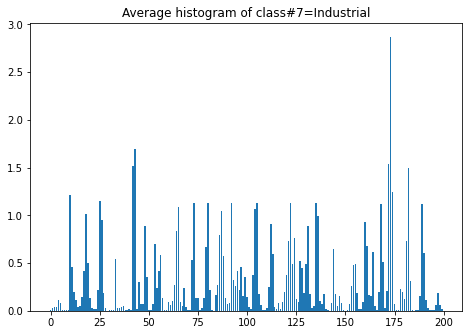

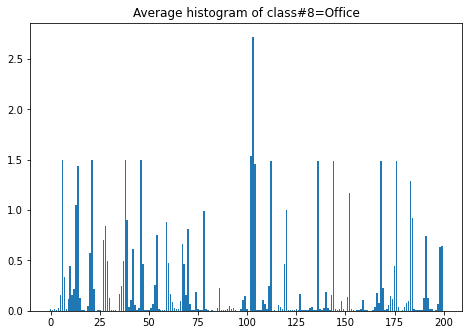

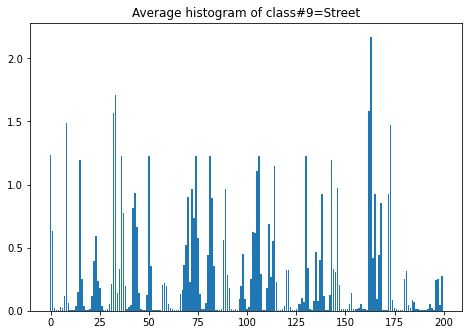

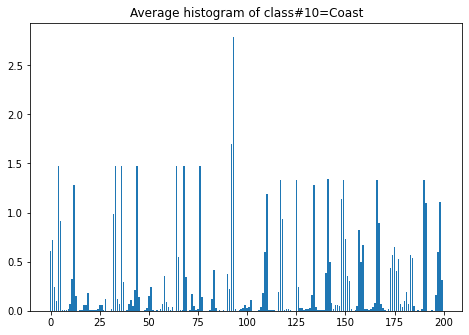

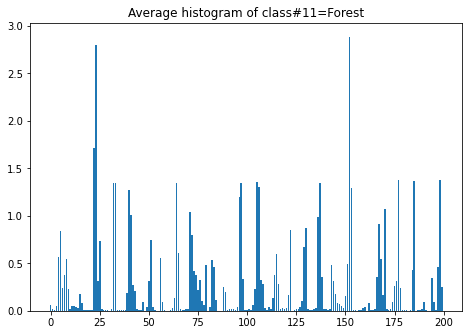

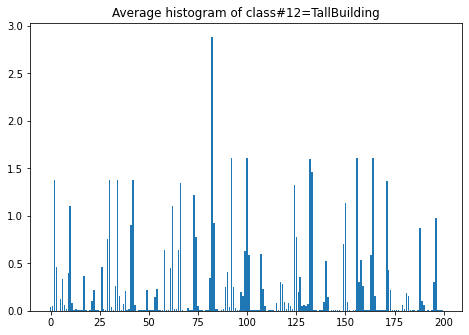

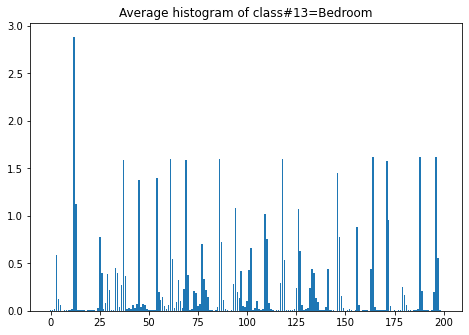

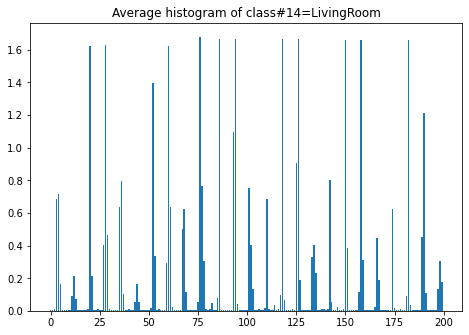

Using nearest neighbor classifier to predict test set categories

Using support vector machine to predict test set categories

---Evaluation---

Accuracy score of kNN algorithm: 35.333333333333336 %
Accuracy score of SVM algorithm: 46.666666666666664 %


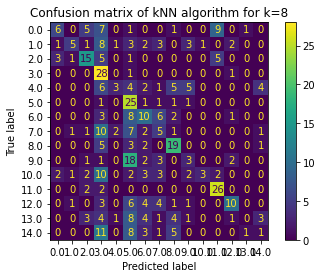

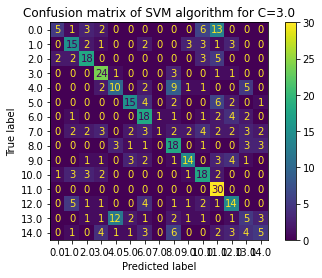

In [3]:
# main.py
#Starter code prepared by Borna Ghotbi, Polina Zablotskaia, and Ariel Shann for Computer Vision
#based on a MATLAB code by James Hays and Sam Birch 

import numpy as np
from util import load, build_vocabulary, get_bags_of_sifts
from classifiers import nearest_neighbor_classify, svm_classify
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#For this assignment, you will need to report performance for sift features on two different classifiers:
# 1) Bag of sift features and nearest neighbor classifier
# 2) Bag of sift features and linear SVM classifier

#For simplicity you can define a "num_train_per_cat" vairable, limiting the number of
#examples per category. num_train_per_cat = 100 for instance.

#Sample images from the training/testing dataset. 
#You can limit number of samples by using the n_sample parameter.

print('Getting paths and labels for all train and test data\n')
train_image_paths, train_labels = load("sift/train")
test_image_paths, test_labels = load("sift/test")
       

''' Step 1: Represent each image with the appropriate feature
 Each function to construct features should return an N x d matrix, where
 N is the number of paths passed to the function and d is the 
 dimensionality of each image representation. See the starter code for
 each function for more details. '''

        
print('Extracting SIFT features\n')
#TODO: You code build_vocabulary function in util.py
kmeans = build_vocabulary(train_image_paths, vocab_size=200)

#TODO: You code get_bags_of_sifts function in util.py 
train_image_feats = get_bags_of_sifts(train_image_paths, kmeans)
test_image_feats = get_bags_of_sifts(test_image_paths, kmeans)
        
#If you want to avoid recomputing the features while debugging the
#classifiers, you can either 'save' and 'load' the extracted features
#to/from a file.

# TODO: Plot the average histograms for each training image
num_of_train = train_image_feats.shape[0]

# Define histogram array
hist_sum = np.ndarray((15, test_image_feats.shape[1]))
counters = np.ndarray((15))
classnames = ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

# Calculate the sum of histograms for each training image class
for i in range(num_of_train):
  feature = train_image_feats[i, :]
  class_name = int(train_labels[i])
  classnames[class_name] = train_image_paths[i].split("/")[2]

  if(hist_sum[class_name,:].all() == None):
    hist_sum[class_name,:] = feature
    counters[class_name] = 1
  else:
    hist_sum[class_name,:] = hist_sum[class_name,:] + feature
    counters[class_name] = counters[class_name] + 1

# Calculate the average histogram
hist_avg = []

for k in range(len(counters)):
  hist_avg.append(hist_sum[k,:]/counters[k])

# Plot the histograms
for j in range(len(counters)):
  vocab = np.arange(0, 200) # vocab_size=200
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(vocab,hist_avg[j])
  plt.title(f'Average histogram of class#{j}={classnames[j]}')
  plt.show()


''' Step 2: Classify each test image by training and using the appropriate classifier
 Each function to classify test features will return an N x l cell array,
 where N is the number of test cases and each entry is a string indicating
 the predicted one-hot vector for each test image. See the starter code for each function
 for more details. '''

print('Using nearest neighbor classifier to predict test set categories\n')
#TODO: YOU CODE nearest_neighbor_classify function from classifers.py
kNN_classifier, pred_labels_knn = nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)
  

print('Using support vector machine to predict test set categories\n')
#TODO: YOU CODE svm_classify function from classifers.py
svm_classifier, pred_labels_svm = svm_classify(train_image_feats, train_labels, test_image_feats)


print('---Evaluation---\n')
# Step 3: Build a confusion matrix and score the recognition system for 
#         each of the classifiers.
# TODO: In this step you will be doing evaluation. 
# 1) Calculate the total accuracy of your model by counting number
#   of true positives and true negatives over all.

# Accuracy for kNN algorithm
kNN_acc = accuracy_score(test_labels, pred_labels_knn)
print("Accuracy score of kNN algorithm:", kNN_acc*100, "%")

# Accuracy for SVM algorithm
svm_acc = accuracy_score(test_labels, pred_labels_svm)
print("Accuracy score of SVM algorithm:", svm_acc*100, "%")

# 2) Build a Confusion matrix and visualize it. 
#   You will need to convert the one-hot format labels back
#   to their category name format.

# Confusion matrix of kNN algorithm
kNN_confusion_mtx = confusion_matrix(test_labels, pred_labels_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=kNN_confusion_mtx, display_labels=kNN_classifier.classes_)
disp.plot()
plt.title("Confusion matrix of kNN algorithm for k=8")
plt.show()

# Confusion matrix of SVM algorithm
svm_confusion_mtx = confusion_matrix(test_labels, pred_labels_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_mtx, display_labels=svm_classifier.classes_)
disp.plot()
plt.title("Confusion matrix of SVM algorithm for C=3.0")
plt.show()

# Interpreting your performance with 100 training examples per category:
#  accuracy  =   0 -> Your code is broken (probably not the classifier's
#                     fault! A classifier would have to be amazing to
#                     perform this badly).
#  accuracy ~= .10 -> Your performance is chance. Something is broken or
#                     you ran the starter code unchanged.
#  accuracy ~= .40 -> Rough performance with bag of SIFT and nearest
#                     neighbor classifier. 
#  accuracy ~= .50 -> You've gotten things roughly correct with bag of
#                     SIFT and a linear SVM classifier.
#  accuracy >= .60 -> You've added in spatial information somehow or you've
#                     added additional, complementary image features. This
#                     represents state of the art in Lazebnik et al 2006.
#  accuracy >= .85 -> You've done extremely well. This is the state of the
#                     art in the 2010 SUN database paper from fusing many 
#                     features. Don't trust this number unless you actually
#                     measure many random splits.
#  accuracy >= .90 -> You used modern deep features trained on much larger
#                     image databases.
#  accuracy >= .96 -> You can beat a human at this task. This isn't a
#                     realistic number. Some accuracy calculation is broken
#                     or your classifier is cheating and seeing the test
#                     labels.


For different classes, the average histograms are different because each class has unique features. That's why, while one class has a high peak around one feature, other class can have a high peak around another features. This shows that every class has its own unique histogram that shows which features are common in the images belong to that class. By looking at these histograms, bedroom and living room have similar features. Also, open country and forest have some common features. 

When we increase the value of k, the accuracy increases, but also the process is slower since we do more calculations while comparing the data with more neighbors. Also, if we increase k too much, then overfitting can be a risk. 

When we increase C value accuracy of the SVM algorithm increases. When C=1.0, the accuracy was 42%. When C=3.0, the accuracy increased to 46.6%.